In [1]:
# Análisis entrópico para procesamiento de lenguajes naturales

## Programa para analizar los corpus 

### Primero cargamos las librerias necesarias:

In [213]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import math
import operator


### Ahora cargamos a jupyter los corpus que se van utilizar:


In [3]:

#cien años de soledad
archivo1 = open("cien_annos_soledad.txt",encoding="utf8",mode='r')
texto1 = archivo1.read()
#crimen y castigo
archivo2 = open("crimenycastigo.txt",mode='r')
texto2 = archivo2.read()
#el retrato de dorian grey
archivo3 = open("retrato.txt",mode='r')
texto3 = archivo3.read()
#el quijote
archivo4 = open("el_quijote.txt",encoding="utf8",mode='r')
texto4 = archivo4.read()
#la isla del tesoro
archivo5 = open("isladeltesoro.txt",mode='r')
texto5 = archivo5.read()
# sentido y sensibilidad
archivo6 = open("sentidosensibilidad.es",encoding="utf8",mode='r')
texto6 = archivo6.read()

textoprueba= """"Hola, hola hola mundo. Esto es una cadena, se supone que debe tener varias palabras pues 
vamos a realizar un conteo de frecuencia de las mismas usando el lenguaje de programación Python. 
Ya no sé qué escribir pero sigo escribiendo para que poco a poco la cadena sea más larga y el 
ejercicio de programación sea demostrable. Creo que con todo esto que he escrito es suficiente"""

totaltext= texto1 + texto2 + texto3 + texto4 + texto5 + texto6


### Ahora cargamos los diccionarios y los unificamos:


In [288]:
#a
archivoa = open("Diccionarios/a.txt",encoding="utf8",mode='r')
dicca = archivoa.read()
#b
archivob = open("Diccionarios/b.txt",encoding="utf8",mode='r')
diccb = archivob.read()
#c
archivoc = open("Diccionarios/c.txt",encoding="utf8",mode='r')
diccc = archivoc.read()
#d
archivod = open("Diccionarios/d.txt",encoding="utf8",mode='r')
diccd = archivod.read()
#e
archivoe = open("Diccionarios/e.txt",encoding="utf8",mode='r')
dicce = archivoe.read()
#f
archivof = open("Diccionarios/f.txt",encoding="utf8",mode='r')
diccf = archivof.read()
#g
archivog = open("Diccionarios/g.txt",encoding="utf8",mode='r')
diccg = archivog.read()
#h
archivoh = open("Diccionarios/h.txt",encoding="utf8",mode='r')
dicch = archivoh.read()
#i
archivoi = open("Diccionarios/i.txt",encoding="utf8",mode='r')
dicci = archivoi.read()
#j
archivoj = open("Diccionarios/j.txt",encoding="utf8",mode='r')
diccj = archivoj.read()
#k
archivok = open("Diccionarios/k.txt",encoding="utf8",mode='r')
dicck = archivok.read()
#l
archivol = open("Diccionarios/l.txt",encoding="utf8",mode='r')
diccl = archivol.read()
#m
archivom = open("Diccionarios/m.txt",encoding="utf8",mode='r')
diccm = archivom.read()
#n
archivon = open("Diccionarios/n.txt",encoding="utf8",mode='r')
diccn = archivon.read()
#ñ
archivoñ = open("Diccionarios/ñ.txt",encoding="utf8",mode='r')
diccñ = archivoñ.read()
#o
archivoo = open("Diccionarios/o.txt",encoding="utf8",mode='r')
dicco = archivoo.read()
#p
archivop = open("Diccionarios/p.txt",encoding="utf8",mode='r')
diccp = archivop.read()
#q
archivoq = open("Diccionarios/q.txt",encoding="utf8",mode='r')
diccq = archivoq.read()
#r
archivor = open("Diccionarios/r.txt",encoding="utf8",mode='r')
diccr = archivor.read()
#s
archivos = open("Diccionarios/s.txt",encoding="utf8",mode='r')
diccs = archivos.read()
#t
archivot = open("Diccionarios/t.txt",encoding="utf8",mode='r')
dicct = archivot.read()
#u
archivou = open("Diccionarios/u.txt",encoding="utf8",mode='r')
diccu = archivou.read()
#v
archivov = open("Diccionarios/v.txt",encoding="utf8",mode='r')
diccv = archivov.read()
#w
archivow = open("Diccionarios/w.txt",encoding="utf8",mode='r')
diccw = archivow.read()
#x
archivox = open("Diccionarios/x.txt",encoding="utf8",mode='r')
diccx = archivox.read()
#y
archivoy = open("Diccionarios/y.txt",encoding="utf8",mode='r')
diccy = archivoy.read()
#z
archivoz = open("Diccionarios/z.txt",encoding="utf8",mode='r')
diccz = archivoz.read()

total_diccionario = dicca + diccb + diccc + diccd + dicce + diccf + diccg + dicch + dicci + diccj + dicck + diccl + diccm + diccn + diccñ + dicco + diccp + diccq + diccr + diccs + dicct + diccu + diccv + diccw + diccx + diccy + diccz

### Creamos una funcion para preparar y limpiar el texto:

Tomamos los libros convertidos en cadenas de texto, le quitamos caracteres que no son letras, convertimos todas las letras a minuscula y convertimos el texto en un arreglo

In [289]:
def preptext(text):
    texto=text
    quitar = "¡!¿?()[],=;_-—''̃'œâ°èäïëöü:~'́'«<>».‘–“ê&~—0123ô…î”456789*\n!\"'"
    for caracter in quitar:
        texto = texto.replace(caracter,"")
    texto = texto.lower()
    palabras = texto.split(" ")
    return palabras

In [290]:
def prepdicc(text):
    texto=text
    quitar = "¡!¿?()[],=;_-—''̃'œâ°èäïëöü:~'́'«<>».‘–“ê&~—0123ô…î”456789*!\"'"
    for caracter in quitar:
        texto = texto.replace(caracter,"")
    texto = texto.lower()
    palabras = texto.split("\n")
    return palabras

### Limpiamos los diccionarios


In [292]:
total_diccionario = prepdicc(total_diccionario)

### Creamos una funcion que nos cuente las palabras para un texto dado y retorne un diccionario:

Esta funcion nos retornara un diccionario en donde al buscar la palabra nos dirá cuantas veces aparece en el texto

In [5]:
def diccionario(words):
    palabras=words
    diccionario_frecuencias = {}
    for palabra in palabras:
        if palabra in diccionario_frecuencias:
            diccionario_frecuencias[palabra] += 1
        else:
            diccionario_frecuencias[palabra] = 1
    return diccionario_frecuencias

### Generamos los diccionarios para los corpus

In [6]:
dicc1= diccionario(preptext(texto1))
dicc2= diccionario(preptext(texto2))
dicc3= diccionario(preptext(texto3))
dicc4= diccionario(preptext(texto4))
dicc5= diccionario(preptext(texto5))
dicc6= diccionario(preptext(texto6))
diccprueba= diccionario(preptext(textoprueba))
dicctotal= diccionario(preptext(totaltext))


### Funciones para analizar los texto: conteo de palabras unicas, palabras totales, palabras de 4 letras y densidas de frecuencia segun tamaño de palabra.

la funcion words returna una pareja de numero donde el primero es el numero de palabras de 4 letras unicas que aparece y el segundo es el numero total de veces que aparecen palabras de 4 letras.

la funcion words4 recibe el diccionario y retorna un diccionario pero de solo las palabras de 4 letras.

In [7]:
def words(diccionario):
    total=0
    for word in diccionario:
        total+= diccionario[word]
    return [len(diccionario),total]

def words4(diccionario):
    diccionario_4={}
    for word in diccionario:
        if len(word)== 4:
            diccionario_4[word]=diccionario[word]
    return diccionario_4


### Densidad de probabilidad segun tamaño de la palabra
Esta funcion retorna una pareja de listas, en donde la primera es el numero de veces que aparecen palabras unicas segun si tamaño, por ejemplo la posicion densidad[0][2] me indica el numero de palabras unicas de 3 letras que hay en el documento. Mientras que la segunda lista me dice el numero de palabras totales, es decir que tiene en cuenta si aparece varias veces una misma palabras.

In [8]:
def densidad(diccionario):
    densidad=[np.zeros(21),np.zeros(21)]
    for word in diccionario:
        for i in range(21):
            if len(word)==i:
                densidad[0][i]+=1
                densidad[1][i]+=diccionario[word]
    return densidad         
            

### Analisis de cada texto:

#### Texto 1: Cien años de soledad

In [9]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc1)[0]}', total de palabras '{words(dicc1)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc1))[0]}', total de palabras de 4 letras '{words(words4(dicc1))[1]}'")

El texto tiene:
palabras unicas'15698', total de palabras '139345'
palabras unicas de 4 letras'551', total de palabras de 4 letras '11197'


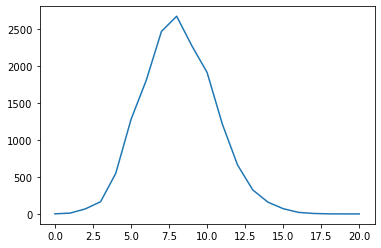

In [10]:
plt.plot(np.arange(21),densidad(dicc1)[0])

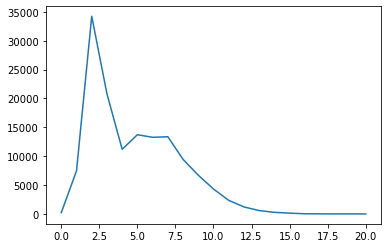

In [11]:
plt.plot(np.arange(21),densidad(dicc1)[1])

#### Texto 2: Crimen y castigo 

In [12]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc2)[0]}', total de palabras '{words(dicc2)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc2))[0]}', total de palabras de 4 letras '{words(words4(dicc2))[1]}'")

El texto tiene:
palabras unicas'27409', total de palabras '160469'
palabras unicas de 4 letras'707', total de palabras de 4 letras '14395'


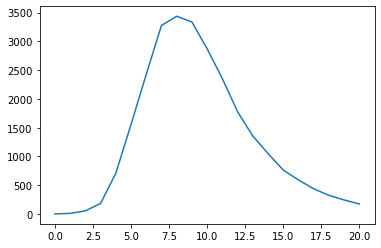

In [13]:
plt.plot(np.arange(21),densidad(dicc2)[0])

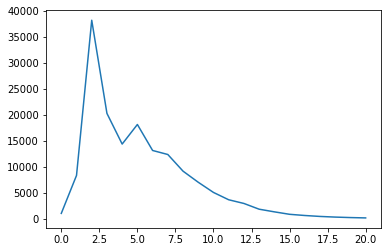

In [14]:
plt.plot(np.arange(21),densidad(dicc2)[1])

#### Texto 3: El retrato de Dorian Gray

In [15]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc3)[0]}', total de palabras '{words(dicc3)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc3))[0]}', total de palabras de 4 letras '{words(words4(dicc3))[1]}'")

El texto tiene:
palabras unicas'15642', total de palabras '70075'
palabras unicas de 4 letras'634', total de palabras de 4 letras '6536'


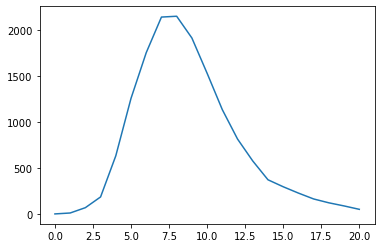

In [16]:
plt.plot(np.arange(21),densidad(dicc3)[0])

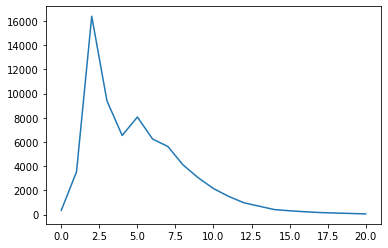

In [17]:
plt.plot(np.arange(21),densidad(dicc3)[1])

#### Texto 4: El Quijote de la mancha

In [18]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc4)[0]}', total de palabras '{words(dicc4)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc4))[0]}', total de palabras de 4 letras '{words(words4(dicc4))[1]}'")

El texto tiene:
palabras unicas'15799', total de palabras '184834'
palabras unicas de 4 letras'642', total de palabras de 4 letras '17765'


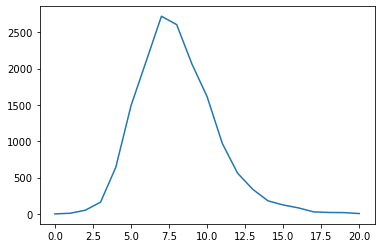

In [19]:
plt.plot(np.arange(21),densidad(dicc4)[0])

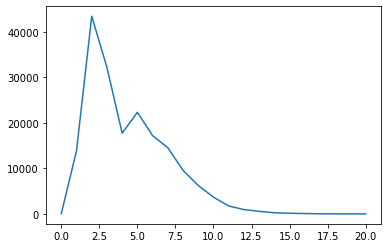

In [20]:
plt.plot(np.arange(21),densidad(dicc4)[1])

#### Texto 5: La isla del tesoro

In [21]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc5)[0]}', total de palabras '{words(dicc5)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc5))[0]}', total de palabras de 4 letras '{words(words4(dicc5))[1]}'")

El texto tiene:
palabras unicas'15968', total de palabras '81864'
palabras unicas de 4 letras'624', total de palabras de 4 letras '7891'


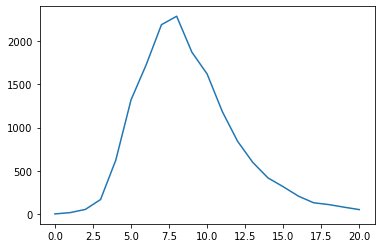

In [22]:
plt.plot(np.arange(21),densidad(dicc5)[0])

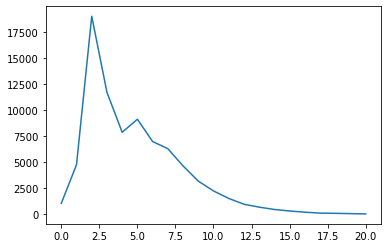

In [23]:
plt.plot(np.arange(21),densidad(dicc5)[1])

#### Texto 6: Sentido y Sensibilidad

In [24]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicc5)[0]}', total de palabras '{words(dicc6)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicc6))[0]}', total de palabras de 4 letras '{words(words4(dicc6))[1]}'")

El texto tiene:
palabras unicas'15968', total de palabras '1938316'
palabras unicas de 4 letras'2161', total de palabras de 4 letras '169936'


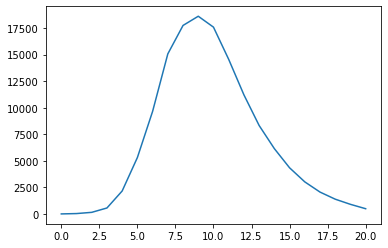

In [25]:
plt.plot(np.arange(21),densidad(dicc6)[0])

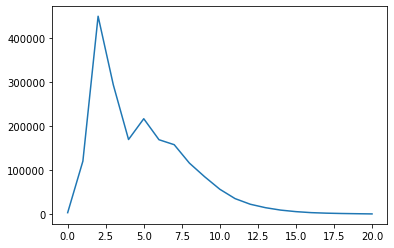

In [26]:
plt.plot(np.arange(21),densidad(dicc6)[1])

#### Suma de todos los textos:

In [27]:
print("El texto tiene:")
print(f"palabras unicas'{words(dicctotal)[0]}', total de palabras '{words(dicctotal)[1]}'")
print(f"palabras unicas de 4 letras'{words(words4(dicctotal))[0]}', total de palabras de 4 letras '{words(words4(dicctotal))[1]}'")

El texto tiene:
palabras unicas'175859', total de palabras '2574898'
palabras unicas de 4 letras'2596', total de palabras de 4 letras '227720'


Text(0, 0.5, 'Palabras')

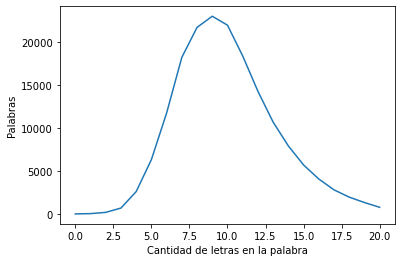

In [28]:
plt.plot(np.arange(21),densidad(dicctotal)[0])
plt.xlabel("Cantidad de letras en la palabra")
plt.ylabel("Palabras")

Text(0, 0.5, 'Palabras')

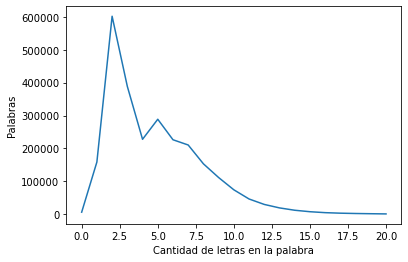

In [29]:
plt.plot(np.arange(21),densidad(dicctotal)[1])
plt.xlabel("Cantidad de letras en la palabra")
plt.ylabel("Palabras")

## Hallamos la probabilidad de cada letra de aparecer en una de las 4 posiciones

Se define una funcion para que a partir del diccionario de la suma de todos los textos y tomando solo palabras de 4 letras, halle la frecuencia con la que aparecen en las distintas posiciones.

Calculamos:
    palabras4: Palabras de cuatro letras y su frecuencia en la totalidad de los textos.
    Numero4u: Cantidad de palabras únicas de 4 letras en todos los textos.
    Numero4: Cantidad de palabras totales de 4 letras en todos los textos.

In [30]:
palabras4= words4(dicctotal) 
Numero4u = words(words4(dicctotal))[0]
Numero4 = words(words4(dicctotal))[1]

In [31]:
def probabilidadletras(diccionario, numero):
    propword1={}
    propword2={}
    propword3={}
    propword4={}
    
    peso = 1/numero
    
    for word in diccionario:
        if word[0] in propword1:
            propword1[word[0]]+=peso
        else:
            propword1[word[0]]=peso
            
    for word in diccionario:
        if word[1] in propword2:
            propword2[word[1]]+=peso
        else:
            propword2[word[1]]=peso
            
    for word in diccionario:
        if word[2] in propword3:
            propword3[word[2]]+=peso
        else:
            propword3[word[2]]=peso
            
    for word in diccionario:
        if word[3] in propword4:
            propword4[word[3]]+=peso
        else:
            propword4[word[3]]=peso
    return [propword1,propword2,propword3,propword4]

In [32]:
probabilidadletras(palabras4,Numero4u)[0]

{'c': 0.06702619414483829,
 'a': 0.0812788906009244,
 'p': 0.06587057010785834,
 'e': 0.04006163328197227,
 'd': 0.057395993836671905,
 'i': 0.025038520801232644,
 'h': 0.03543913713405237,
 't': 0.055084745762711954,
 'v': 0.03967642526964561,
 'j': 0.013482280431432982,
 'm': 0.07318952234206472,
 'r': 0.052773497688752,
 'l': 0.05161787365177203,
 's': 0.07280431432973807,
 'o': 0.03852080123266564,
 'b': 0.043913713405238856,
 'u': 0.011941448382126355,
 'y': 0.028890600924499195,
 'ñ': 0.0003852080123266564,
 'é': 0.01386748844375964,
 'g': 0.02388289676425268,
 'n': 0.03466872110939905,
 'f': 0.03197226502311244,
 'q': 0.0057781201848998475,
 'ú': 0.0003852080123266564,
 'ó': 0.001926040061633282,
 'x': 0.010015408320493071,
 'á': 0.006548536209553161,
 'z': 0.004622496147919877,
 'k': 0.008474576271186444,
 'w': 0.002696456086286595,
 'í': 0.0007704160246533128}

In [33]:
probabilidadletras(palabras4,Numero4u)[1]

{'i': 0.12865947611710268,
 'ñ': 0.001926040061633282,
 'a': 0.17141756548536255,
 'l': 0.041987673343605564,
 'o': 0.14830508474576262,
 'e': 0.13559322033898266,
 'm': 0.012326656394453012,
 'u': 0.08744221879815083,
 's': 0.03466872110939905,
 'd': 0.011556240369799698,
 'r': 0.057395993836671905,
 't': 0.010400616332819728,
 'n': 0.01848998459167951,
 'í': 0.03197226502311244,
 'c': 0.006933744221879818,
 'ó': 0.0015408320493066256,
 'g': 0.004622496147919877,
 'z': 0.00423728813559322,
 'b': 0.008089368258859787,
 'j': 0.003852080123266564,
 'q': 0.00423728813559322,
 'p': 0.006548536209553161,
 'y': 0.006933744221879818,
 'é': 0.01386748844375964,
 'v': 0.008859784283513101,
 'h': 0.016563944530046233,
 'f': 0.0030816640986132513,
 'ú': 0.007704160246533131,
 'á': 0.0023112480739599386,
 'x': 0.006548536209553161,
 'w': 0.0015408320493066256,
 'k': 0.0003852080123266564}

In [34]:
probabilidadletras(palabras4,Numero4u)[2]

{'e': 0.07627118644067793,
 'o': 0.04237288135593222,
 'r': 0.07318952234206472,
 'i': 0.05161787365177203,
 'm': 0.04892141756548542,
 'd': 0.049691833590138734,
 'á': 0.006933744221879818,
 'z': 0.016178736517719578,
 's': 0.07318952234206472,
 'y': 0.025808936825885954,
 'l': 0.07627118644067793,
 't': 0.06471494607087838,
 'p': 0.01848998459167951,
 'g': 0.02696456086286592,
 'í': 0.012711864406779669,
 'n': 0.0701078582434515,
 'c': 0.03967642526964561,
 'j': 0.018875192604006163,
 'ñ': 0.013482280431432982,
 'v': 0.016178736517719578,
 'a': 0.08397534668721096,
 'h': 0.014252696456086296,
 'b': 0.023497688751926024,
 'u': 0.024268104776579334,
 'ú': 0.001926040061633282,
 'f': 0.008089368258859787,
 'é': 0.006548536209553161,
 'x': 0.006933744221879818,
 'ó': 0.0030816640986132513,
 'k': 0.0034668721109399076,
 'w': 0.0023112480739599386}

In [35]:
probabilidadletras(palabras4,Numero4u)[3]

{'n': 0.05546995377503861,
 's': 0.09013867488443739,
 'a': 0.20916795069337576,
 'o': 0.17565485362095587,
 'é': 0.03081664098613247,
 'á': 0.010400616332819728,
 'e': 0.132896764252696,
 'ó': 0.041602465331278905,
 'd': 0.012326656394453012,
 'r': 0.02850539291217254,
 'l': 0.03582434514637903,
 'í': 0.021956856702619404,
 'z': 0.008089368258859787,
 'i': 0.031201848998459125,
 'c': 0.0034668721109399076,
 'u': 0.010400616332819728,
 'm': 0.00423728813559322,
 'k': 0.006933744221879818,
 'y': 0.036979969183359,
 'b': 0.0011556240369799693,
 'h': 0.011941448382126355,
 'p': 0.0023112480739599386,
 't': 0.017334360554699543,
 'g': 0.004622496147919877,
 'ú': 0.0057781201848998475,
 'x': 0.002696456086286595,
 'f': 0.00423728813559322,
 'w': 0.0007704160246533128,
 'j': 0.0007704160246533128,
 'v': 0.0023112480739599386}

Creamos la lista de caracteres analizados:

In [36]:
caracteres = sorted(set(list(probabilidadletras(palabras4,Numero4u)[0].keys())+list(probabilidadletras(palabras4,Numero4u)[1].keys()) + list(probabilidadletras(palabras4,Numero4u)[2].keys())+list(probabilidadletras(palabras4,Numero4u)[3].keys())))
caracteres


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'á',
 'é',
 'í',
 'ñ',
 'ó',
 'ú']

### Modelo Independiente
Creamos una función para, a partir de las probabilidades individuales de cada letra en cada posición, hallar la probabilidad de una palabra en específico.

In [37]:
def probabilidadpalabra (listaprobletras, listapalabra):
    product = 1
    pos = 0
    for letra in listapalabra:
        product*=listaprobletras[pos][letra]
        pos+=1
    return product
          

Haciendo uso de la función anterior, calculamos la probabilidad para todas las posibles combinaciones de 4 letras:

In [38]:
def probabilidadpalabras (listaprobletras):
    probpalabra={}
    for letra1 in listaprobletras[0].keys():
        for letra2 in listaprobletras[1].keys():
            for letra3 in listaprobletras[2].keys():
                for letra4 in listaprobletras[3].keys():
                    probpalabra[letra1+letra2+letra3+letra4]=probabilidadpalabra (listaprobletras,[letra1,letra2,letra3,letra4])
    return probpalabra

Probabilidad de ejemplo para la palabra "Hola"

In [39]:
probabilidadpalabra (probabilidadletras(palabras4,Numero4u),["h","o","l","a"])

8.384840857266018e-05

Probabilidad de ejemplo para la palabra "zzzz"

In [40]:
probabilidadpalabra (probabilidadletras(palabras4,Numero4u),["a","a","a","a"])

0.00024472595782767346

In [41]:
densidadindependiente = probabilidadpalabras(probabilidadletras(palabras4,Numero4u))

In [42]:
def entropia (probabilidadpalabras):
    entropia = 0;
    for palabra in probabilidadpalabras.keys():
        if probabilidadpalabras[palabra] != 0:
            entropia+=(probabilidadpalabras[palabra]*math.log(probabilidadpalabras[palabra],2))
    return -entropia

In [43]:
entropiaindependiente = entropia (densidadindependiente)
entropiaindependiente

16.45505662632604

### Modelo Completo

In [44]:
def probpalabrascomp (listaprobletras, dicc4, Num4):
    probpalabra={}
    for letra1 in listaprobletras:
        for letra2 in listaprobletras:
            for letra3 in listaprobletras:
                for letra4 in listaprobletras:
                    if (letra1+letra2+letra3+letra4)in dicc4.keys():
                        probpalabra[letra1+letra2+letra3+letra4]=dicc4[letra1+letra2+letra3+letra4]/Num4
                    else:
                        probpalabra[letra1+letra2+letra3+letra4]=0
    return probpalabra

In [45]:
densidadcompleta = probpalabrascomp (caracteres, words4(dicctotal),words(words4(dicctotal))[1])

In [46]:
entropiacompleta = entropia (densidadcompleta)
entropiacompleta

7.527299650659654

Por ejemplo, para la palabra "hola"

In [47]:
densidadcompleta["hola"]

5.708765150184437e-05

Y para el caso "zzzz"

In [48]:
densidadcompleta["aaaa"]

0

La cantidad de probabilidades que no aparecieron en el nuevo modelo completo son:

In [49]:
list(densidadcompleta.values()).count(0)



1045980

### Modelo de correlaciones

Cálculo de los marginales pareados:

In [250]:
def margdistr (dicc4, pos1, pos2, char1, char2,numer4):
    margindistribution = 0
    for palabra in dicc4.keys():
        if palabra[pos1]==char1 and palabra[pos2]==char2:
            margindistribution += dicc4[palabra]
    return margindistribution/numer4
        

Por ejemplo, para las letras "d" y "a" en las posiciones 0 y 1 respectivamente.

In [251]:
margdistr (palabras4, 2, 3, "d", "a", Numero4)

0.04426049534516072

Agrupamos los marginales en diccionarios para cada combinación de dos letras:

In [52]:
def margtotal (dicc4, caracteres, pos1, pos2,numer4):
    potencial = {}
    for letra1 in caracteres:
        for letra2 in caracteres:
            potencial [letra1+letra2]= margdistr (dicc4, pos1, pos2, letra1, letra2,numer4)
    return potencial
    

In [53]:
marg12 = margtotal (palabras4, caracteres, 0, 1,Numero4)
marg23 = margtotal (palabras4, caracteres, 1, 2,Numero4)
marg34 = margtotal (palabras4, caracteres, 2, 3,Numero4)
marg13 = margtotal (palabras4, caracteres, 0, 2,Numero4)
marg24 = margtotal (palabras4, caracteres, 1, 3,Numero4)
marg14 = margtotal (palabras4, caracteres, 0, 3,Numero4)
marg = [marg12, marg23, marg34, marg13, marg24, marg14]

In [54]:
sum (marg12.values())

0.999999999999999

A partir de las distribuciones marginales, sacaremos el vocabulario eficaz (palabra cuya probabilidad es diferente de 0):

In [55]:
def vocabefic (caracteres, palabras4, Numero4):
    vocabulario = []
    for letra1 in caracteres:
        for letra2 in caracteres:
            for letra3 in caracteres:
                for letra4 in caracteres:
                    if (margdistr (palabras4, 0, 1, letra1, letra2, Numero4) > 0 
                    and margdistr (palabras4, 1, 2, letra2, letra3, Numero4) > 0 
                    and margdistr (palabras4, 2, 3, letra3, letra4, Numero4) > 0 
                    and margdistr (palabras4, 0, 2, letra1, letra3, Numero4) > 0 
                    and margdistr (palabras4, 1, 3, letra2, letra4, Numero4) > 0 
                    and margdistr (palabras4, 0, 3, letra1, letra4, Numero4) > 0):
                        vocabulario.append(letra1+letra2+letra3+letra4)
    sorted(vocabulario)
    return vocabulario
        

In [56]:
vocabulario_eficaz = vocabefic(caracteres, palabras4, Numero4)

La siguiente función nos permite hacer una iteración para hallar los "potenciales" de interacción a partir de los marginales, y con ellos la probabilidad teórica de cada palabra según el modelo de correlación por pares.

In [170]:
def potencial (vocabulario, caracteres, palabras4, numer4, marg):
    longitud = len(vocabulario)
    potencial12={}
    potencial23={}
    potencial34={}
    potencial13={}
    potencial24={}
    potencial14={}
    for letra1 in caracteres:
        for letra2 in caracteres:
            potencial12[letra1+letra2]=(1-math.log(longitud))/6
            potencial23[letra1+letra2]=(1-math.log(longitud))/6
            potencial34[letra1+letra2]=(1-math.log(longitud))/6
            potencial13[letra1+letra2]=(1-math.log(longitud))/6
            potencial24[letra1+letra2]=(1-math.log(longitud))/6
            potencial14[letra1+letra2]=(1-math.log(longitud))/6
    P={}
    for letra1 in caracteres:
        for letra2 in caracteres:
            for letra3 in caracteres:
                for letra4 in caracteres:
                    P[letra1+letra2+letra3+letra4]=0
    for i in range(1024):
        for palabra in vocabulario:
            #print("Suma de pot", palabra,  potencial12[palabra[0]+palabra[1]]+potencial23[palabra[1]+palabra[2]]
            #                      +potencial34[palabra[2]+palabra[3]]+potencial13[palabra[0]+palabra[2]]
            #                      +potencial24[palabra[1]+palabra[3]]+potencial14[palabra[0]+palabra[3]]-1)
            P [palabra]= math.exp(potencial12[palabra[0]+palabra[1]]+potencial23[palabra[1]+palabra[2]]
                                  +potencial34[palabra[2]+palabra[3]]+potencial13[palabra[0]+palabra[2]]
                                  +potencial24[palabra[1]+palabra[3]]+potencial14[palabra[0]+palabra[3]]-1)
        E12 = {}
        E23 = {}
        E34 = {}
        E13 = {}
        E24 = {}
        E14 = {} 
        for letra1 in caracteres:
            for letra2 in caracteres:
                E12[letra1+letra2] = 0
                E23[letra1+letra2] = 0
                E34[letra1+letra2] = 0
                E13[letra1+letra2] = 0
                E24[letra1+letra2] = 0
                E14[letra1+letra2] = 0
        for palabra in vocabulario:
            E12[palabra[0]+palabra[1]]+=P[palabra]
            E23[palabra[1]+palabra[2]]+=P[palabra]
            E34[palabra[2]+palabra[3]]+=P[palabra]
            E13[palabra[0]+palabra[2]]+=P[palabra]
            E24[palabra[1]+palabra[3]]+=P[palabra]
            E14[palabra[0]+palabra[3]]+=P[palabra]

        for letra1 in caracteres:    
            for letra2 in caracteres:
                md12 = marg[0][letra1+ letra2]
                if md12  > 0:
                    #print ("log1", math.log(md12/E12[letra1+letra2])/6)
                    potencial12[letra1+letra2]+=math.log(md12/E12[letra1+letra2])/(6*1024)
                for letra3 in caracteres:
                    md23 = marg[1][letra2+ letra3]
                    md13 = marg[3][letra1+ letra3]
                    if md23 > 0:
                        #print ("log2", math.log(md23/E23[letra2+letra3])/6)
                        potencial23[letra2+letra3]+=math.log(md23/E23[letra2+letra3])/(6*1024)
                    if md13 > 0:
                        #print ("log4", math.log(md13/E13[letra1+letra3])/6)
                        potencial13[letra1+letra3]+=math.log(md13/E13[letra1+letra3])/(6*1024)
                    for letra4 in caracteres:
                        md34 = marg[2][letra3+ letra4]
                        md24 = marg[4][letra2+ letra4]
                        md14 = marg[5][letra1+ letra4]
                        if md34 > 0:
                            potencial34[letra3+letra4]+=math.log(md34/E34[letra3+letra4])/(6*1024)
                        if md24 > 0:
                            #print ("log5", math.log(md24/E24[letra2+letra4])/6)
                            potencial24[letra2+letra4]+=math.log(md24/E24[letra2+letra4])/(6*1024)
                        if md14 > 0:
                            #print ("log6", math.log(md14/E14[letra1+letra4])/6)
                            potencial14[letra1+letra4]+=math.log(md14/E14[letra1+letra4])/(6*1024)
        
    return [potencial12, potencial23, potencial34, potencial13, potencial24, potencial14, P]

Sacamos cada uno de los potenciales de interacción, pero también la densidad de probabilidad por cada palabra:

In [171]:
potinterac = potencial (vocabulario_eficaz, caracteres, palabras4, Numero4, marg)
potinterac12=potinterac[0]
potinterac23=potinterac[1]
potinterac34=potinterac[2]
potinterac13=potinterac[3]
potinterac24=potinterac[4]
potinterac14=potinterac[5]

Algunos ejemplos de palabras en la nueva distribución d eprobabilidad:

In [172]:
densidadcorrelacion = potinterac[6]
densidadcorrelacion["hola"]

0.00014102142970393201

In [176]:
densidadcorrelacion["zzzz"]

0

Verificamos que no se haya perdido en gran medida la condición de normalidad para las palabras al hacer las iteraciones:

In [177]:
sum(densidadcorrelacion.values())

0.999886151246334

Y la entropía para este modelo es:

In [178]:
entropiacorrelacion = entropia (densidadcorrelacion)
entropiacorrelacion

9.034173785966932

Podemos calcular, además, el vocabulario efectivo:

In [191]:
vocabcorrelacion_len = int(2**entropiacorrelacion)
vocabcorrelacion_len

524

In [252]:
vocabulariocorrelacion = dict(sorted(densidadcorrelacion.items(), key=operator.itemgetter(1), reverse=True)[0:vocabcorrelacion_len])

In [308]:
def palabrascoinciden (vocabulariocorrelacion, densidadcompleta):
    coinciden={}
    lista = []
    if type(densidadcompleta) == list:
        lista = densidadcompleta
    else:
        lista = densidadcompleta.keys()
    for palabra in vocabulariocorrelacion.keys():
        if palabra in lista:
            coinciden[palabra]=vocabulariocorrelacion[palabra]
    return coinciden

Revisamos cuántas palabras del nuevo vocabulario coinciden con las presentes en el modelo completo y en los textos:

In [309]:
coincidencias=palabrascoinciden (vocabulariocorrelacion, palabras4)
coincidencias

{'como': 0.04348453445684193,
 'para': 0.03640871421089544,
 'dijo': 0.028249222319415835,
 'pero': 0.026023461493595013,
 'bien': 0.01855504112089674,
 'todo': 0.015993849116121436,
 'esta': 0.015008211848048831,
 'ella': 0.01334378003795914,
 'casa': 0.011998062355527979,
 'este': 0.011228505248309236,
 'esto': 0.010920108755015786,
 'otro': 0.010084986572698022,
 'otra': 0.009488091016086157,
 'sólo': 0.00904595311192098,
 'está': 0.009010051068488283,
 'aquí': 0.008451250074796943,
 'pera': 0.008093349578074735,
 'pues': 0.007684129712352383,
 'cual': 0.00765848737243131,
 'gran': 0.0075998293178694155,
 'paro': 0.0074315363678288185,
 'poco': 0.007081441326998139,
 'cómo': 0.007004144372890374,
 'allí': 0.00694263203348158,
 'ojos': 0.006475418744230217,
 'casi': 0.0054294355232865155,
 'coma': 0.005407982473913494,
 'dios': 0.005272215056158134,
 'sino': 0.004867925364006771,
 'nada': 0.004867010235741433,
 'algo': 0.004685820608550942,
 'cara': 0.004594487695518743,
 'buen': 0.0

In [310]:
len(list(coincidencias.keys()))

278

Y aquellas palabras "predichas" o "inventadas" por el modelo:

In [313]:
def palabrasnocoinciden (vocabulariocorrelacion, densidadcompleta):
    nocoinciden={}
    lista = []
    if type(densidadcompleta) == list:
        lista = densidadcompleta
    else:
        lista = densidadcompleta.keys()
    for palabra in vocabulariocorrelacion.keys():
        if not(palabra in lista):
            nocoinciden[palabra]=vocabulariocorrelacion[palabra]
    return nocoinciden

In [314]:
palabras_creadas = palabrasnocoinciden (vocabulariocorrelacion, palabras4)
palabras_creadas 

{'piro': 0.0044306018571409434,
 'tido': 0.004157956533482435,
 'pres': 0.004093487628698409,
 'aste': 0.003943047979757256,
 'tada': 0.003693454482213459,
 'bijo': 0.003539165014676019,
 'vada': 0.0033723532012524694,
 'sodo': 0.003342231036462727,
 'pira': 0.003285250190192714,
 'dajo': 0.0032044417562175076,
 'tues': 0.003143313308677219,
 'illa': 0.0029321294397435258,
 'tudo': 0.0027477222703311903,
 'uños': 0.002684739288902025,
 'noda': 0.00250242078514939,
 'podo': 0.002487132099986853,
 'coso': 0.002378363531209926,
 'cemo': 0.0023739764698520187,
 'dabe': 0.0021474720495081286,
 'tado': 0.0020787787269638223,
 'pora': 0.002077845964876698,
 'bren': 0.0020620024134272133,
 'dija': 0.0019010249993636269,
 'camo': 0.0017920683335659008,
 'voda': 0.0017793485085216133,
 'onos': 0.0015012356520499462,
 'ejos': 0.0014591933814691231,
 'cusa': 0.001432382016726646,
 'atra': 0.0014305846640202697,
 'daja': 0.0014248026834571897,
 'ties': 0.001313348998260363,
 'clmo': 0.0012960339429

In [315]:
len(list(palabras_creadas.keys()))

246

De estas palabras no presentes en los textos, usamos el diccionario para revisar cuántas efectivamente existen en el idioma español.

In [317]:
palabras_predichas = palabrascoinciden (palabras_creadas, total_diccionario)
palabras_predichas

{'piro': 0.0044306018571409434,
 'pira': 0.003285250190192714,
 'illa': 0.0029321294397435258,
 'podo': 0.002487132099986853,
 'coso': 0.002378363531209926,
 'pora': 0.002077845964876698,
 'bren': 0.0020620024134272133,
 'tuda': 0.001147969238713957,
 'coda': 0.0010409185578663337,
 'hoce': 0.0010103613896333447,
 'lada': 0.0009069911350667396,
 'rijo': 0.000858025937784679,
 'nodo': 0.0008407507650822489,
 'posa': 0.0007837171848738025,
 'domo': 0.0007834353067455176,
 'nomo': 0.00071205601888141,
 'haza': 0.000620505788070136,
 'ecto': 0.0004949702859342413,
 'cado': 0.0004670159063222114,
 'somo': 0.00045264747605127466,
 'haba': 0.00043920804801463883,
 'molo': 0.0004182662124783505,
 'haca': 0.0003675647274559988,
 'ludo': 0.00035325387017187974,
 'cida': 0.00034569107571678556,
 'sebe': 0.0003097312568332796,
 'sida': 0.0002971459051897009,
 'peer': 0.00027917441290199437,
 'meso': 0.0002706443610729625,
 'sapa': 0.0002699559800132236,
 'moto': 0.0002692272050334762,
 'piño': 0.0

In [318]:
len(list(palabras_predichas.keys()))

34

Y cuántas fueron inventadas por el modelo de correlaciones:

In [319]:
palabras_inventadas = palabrasnocoinciden (palabras_creadas, total_diccionario)
palabras_inventadas

{'tido': 0.004157956533482435,
 'pres': 0.004093487628698409,
 'aste': 0.003943047979757256,
 'tada': 0.003693454482213459,
 'bijo': 0.003539165014676019,
 'vada': 0.0033723532012524694,
 'sodo': 0.003342231036462727,
 'dajo': 0.0032044417562175076,
 'tues': 0.003143313308677219,
 'tudo': 0.0027477222703311903,
 'uños': 0.002684739288902025,
 'noda': 0.00250242078514939,
 'cemo': 0.0023739764698520187,
 'dabe': 0.0021474720495081286,
 'tado': 0.0020787787269638223,
 'dija': 0.0019010249993636269,
 'camo': 0.0017920683335659008,
 'voda': 0.0017793485085216133,
 'onos': 0.0015012356520499462,
 'ejos': 0.0014591933814691231,
 'cusa': 0.001432382016726646,
 'atra': 0.0014305846640202697,
 'daja': 0.0014248026834571897,
 'ties': 0.001313348998260363,
 'clmo': 0.0012960339429379313,
 'doda': 0.0012639238622442353,
 'asto': 0.0012495676412724143,
 'oara': 0.0012451192821951492,
 'dras': 0.0012282309543131034,
 'aigo': 0.0011915095595804014,
 'nida': 0.0011630464884421583,
 'elta': 0.001147716

In [320]:
len(list(palabras_inventadas.keys()))

212